# NLTK 
Sentence Segmentation and Tokenization Examples:


In [ ]:
import nltk
# nltk.download('punkt') # you need this when calling for the first time.

In [ ]:
nltk.sent_tokenize("She had a brown cat. It purred when someone called her.")

['She had a brown cat.', 'It purred when someone called her.']

In [ ]:
nltk.word_tokenize("Show me movies directed by Woody Allen recently.")

['Show', 'me', 'movies', 'directed', 'by', 'Woody', 'Allen', 'recently', '.']

Tools for counting and computing stats in NLTK

In [ ]:
nltk.download('book')
from nltk.book import *

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.concordance('child')

Displaying 18 of 18 matches:
e try to explain them . When I was a child , I well remember a somewhat similar
th loud lament the parents saw their child borne out of sight over the wide wat
y that sweet girl that old man has a child : hold ye then there can be any utte
 memories of his young Cape wife and child , tend to bend him still more from t
tender than the skin of a new - born child . But no more of this . Assuming the
 he would have been deified by their child - magian thoughts . They deified the
shery , that they are accounted mere child ' s play . Some one strips off a fro
hings tapers off at last into simple child ' s play . CHAPTER 104 The Fossil Wh
AT is all wrinkles ! But , away with child ' s play ; no more gaffs and pikes t
ire thou madest me , and like a true child of fire , I breathe it back to thee 
buck may survive to hug his wife and child again .-- Oh Mary ! Mary !-- boy ! b
wn here . Ye did beget this luckless child , and have abandoned him , ye creati
a boy , Cap

In [ ]:
words = [word.lower() for word in text1]
print(len(words))
print(words)

In [ ]:
fdist = nltk.FreqDist(words)
fdist.N()

260819

In [ ]:
fdist.most_common(10)

[(',', 18713),
 ('the', 14431),
 ('.', 6862),
 ('of', 6609),
 ('and', 6430),
 ('a', 4736),
 ('to', 4625),
 ('in', 4172),
 (';', 4072),
 ('that', 3085)]

Part=of-speech tagging

In [ ]:
nltk.pos_tag(text1)

In [ ]:
nltk.help.upenn_tagset("RB")

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


Let's plot the rank/freq curves for text1 (zooming into the top 100 items):

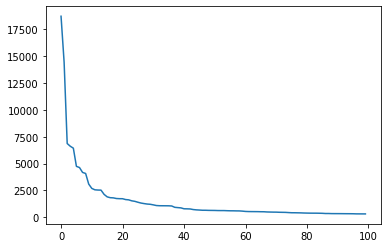

In [ ]:
import matplotlib.pyplot as plt

freq1 = sorted(fdist.items(), key=lambda kv: kv[1], reverse=True)
freq_sorted_vocab = [freq1[i][1] for i in range(len(freq1))]

vocab_index = [i for i in range(len(fdist))]

plt.plot(vocab_index[:100], freq_sorted_vocab[:100],'-')

plt.show()

#Spacy 
Tokenization with Spacy. Examples of lemmatization, Part-of-speech tagging, dependency parsing and entity tagging:

In [ ]:
import spacy

nlp = spacy.load("en")

text = "Show me movies directed by Woody Allen recently."
doc = nlp(text)
for token in doc:
  print("%s %s %s %s %s %s" % 
        (token, token.lemma_, token.pos_, token.dep_, token.head, token.ent_type_))


Show show VERB ROOT Show 
me -PRON- PRON dative Show 
movies movie NOUN dobj Show 
directed direct VERB acl movies 
by by ADP agent directed 
Woody Woody PROPN compound Allen PERSON
Allen Allen PROPN pobj by PERSON
recently recently ADV advmod directed 
. . PUNCT punct Show 


Chunking with Spacy:

In [ ]:
for chunk in doc.noun_chunks:
  print(chunk)

me
movies
Woody Allen


Named entity tagging with Spacy:

In [ ]:
text = "Heywood Allen better known as Woody Allen was born in 1935."
doc = nlp(text)
for ent in doc.ents:
  print("%s %s %s %s" % (ent.text, ent.start_char, ent.end_char, ent.label_))


Training your own classifier with sklearn



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)
gnb = GaussianNB()
print(X_test[1]) # printing features of the first example
print(y_test)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(y_pred)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))

[6.  2.2 4.  1. ]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1]
Number of mislabeled points out of a total 15 points : 1
